<a href="https://colab.research.google.com/github/singhmanpreet1308/EDA/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
ROOT = "/content/drive/MyDrive/EDA"
os.chdir(ROOT)

os.getcwd()

'/content/drive/MyDrive/EDA'

Breakdown of this notebook:


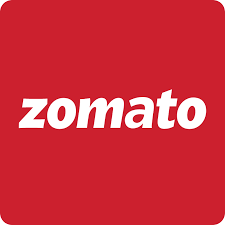

The basic idea of analyzing the **Zomato** Business Problem is to get a fair idea about the factors affecting the establishment of different types of restaurant at **different places in Bengaluru**, aggregate rating of each restaurant, Bengaluru being one such city has more than **12,000 restaurants** with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

- What kind of a food is more popular in a locality.
- Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as 
- Location of the restaurant.
- Approx Price of food Theme based restaurant or not.
- Which locality of that city serves that cuisines with maximum number of restaurants 
- The needs of people who are striving to get the best cuisine of the neighborhood.
- Is a particular neighborhood famous for its own kind of food.

In [ ]:
## Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
## Reading the Dataset
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
print("Dataset contains {} rows and {} columns.".format(df.shape[0],df.shape[1]))

Dataset contains 51717 rows and 17 columns.


In [ ]:
#Looking at the information about the dataset, datatypes of the coresponding columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Columns description**

- **url**
contains the url of the restaurant in the zomato website

- **address**
contains the address of the restaurant in Bengaluru

- **name**
contains the name of the restaurant

- **online_order**
whether online ordering is available in the restaurant or not

- **book_table**
table book option available or not

- **rate**
contains the overall rating of the restaurant out of 5

- **votes**
contains total number of rating for the restaurant as of the above mentioned date

- **phone**
contains the phone number of the restaurant

- **location**
contains the neighborhood in which the restaurant is located

- **rest_type**
restaurant type

- **dish_liked**
dishes people liked in the restaurant

- **cuisines**
food styles, separated by comma

- **approx_cost(for two people)**
contains the approximate cost for meal for two people

- **reviews_list**
list of tuples containing reviews for the restaurant, each tuple 

- **menu_item**
contains list of menus available in the restaurant

- **listed_in(type)**
type of meal

- **listed_in(city)**
contains the neighborhood in which the restaurant is listed


In [ ]:
#Checking null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Deleting Unnnecessary Columns
## Dropping the column "dish_liked", "phone", "url"
df = df.drop(['url','dish_liked','phone'],axis=1)
df.shape

(51717, 14)

In [ ]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#Remove the NaN values from the dataset
df.isna().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:
# Reading the columns
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
## Change the name of the columns
df = df.rename(columns={'approx_cost(for two people)': 'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
## Some Transformation
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost']= df['cost'].apply(lambda x: x.replace(',','.'))  #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) #Changing the cost to float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [ ]:
# Reading unique values from 'rate' column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing '/5' from rate column
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## Visualizations

Text(0.5, 0, 'Number of outlets')

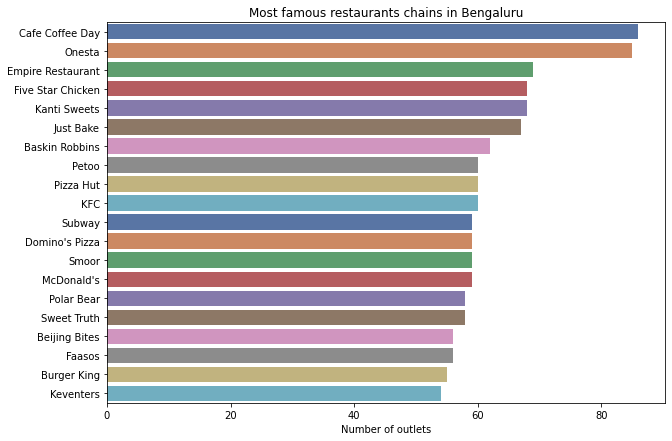

In [ ]:
# 1) Which the top restaurant chains in Bengluru
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bengaluru")
plt.xlabel("Number of outlets")

In [ ]:
# 2) How many of the restaurats do not accept online orders
x = df['online_order'].value_counts()
colors = ['#FEBFB3', '#E1396C']
trace=go.Pie(labels=x.index,values=x,textinfo="value",marker=dict(colors=colors,  line=dict(color='#000000', width=2)))
layout = go.Layout(title="Accepting V/S Not Accepting Online_Orders",width=500,height=500)
fig = go.Figure(data=[trace],layout = layout)
py.iplot(fig, filename='pie_chart_subplots')

In [ ]:
# 3) What is the ratio between restaurants provide table booking or not
x=df['book_table'].value_counts()
colors = ['#96D38C', '#D0F9B1']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Table booking",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



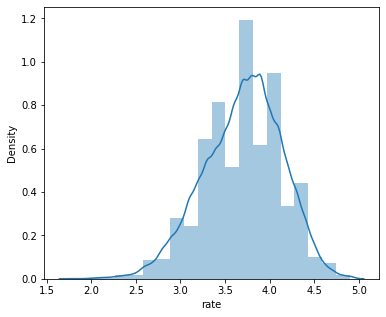

In [ ]:
# 4) Rating distribution
plt.figure(figsize=(6,5))
sns.distplot(df['rate'],bins=20)

- Almost more than 50 percent of restaurants has rating between 3 and 4.
- Restaurants having rating more than 4.5 are very rare.

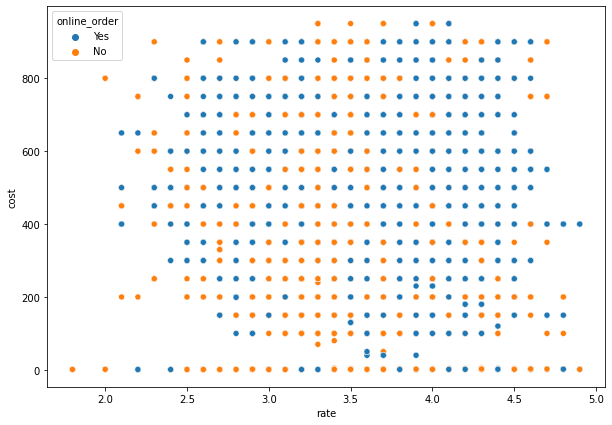

In [ ]:
# 4) Cost V/S Rating 
cost_dist=df[['rate','cost','online_order']]
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y="cost",hue='online_order',data=cost_dist)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



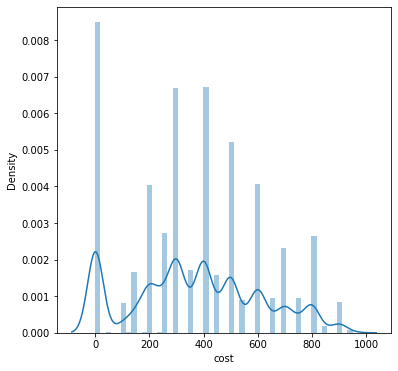

In [ ]:
# 5) Distribution of cost column
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['cost'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'count')

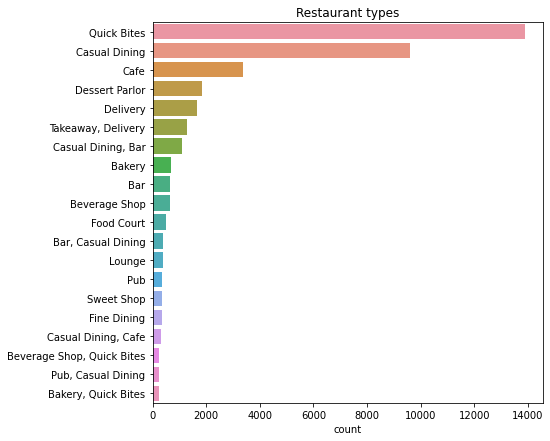

In [ ]:
# 6) Which are the most common restaurants type in Bengaluru
plt.figure(figsize=(7,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Location wise count for restaurants')

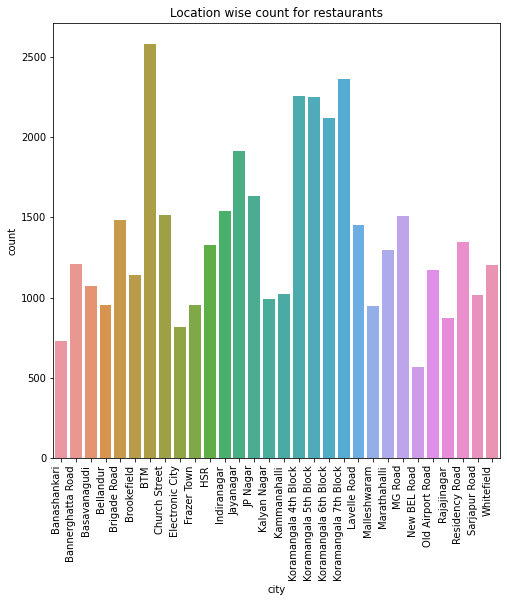

In [ ]:
# 7) What are  the locations of most of the restaurants
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Location wise count for restaurants')

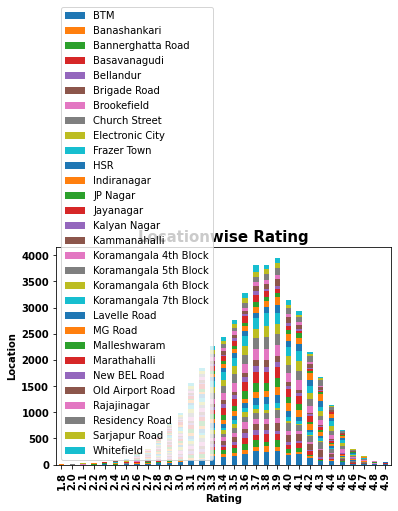

In [ ]:
# 7) Location wise ratings of the restaurants
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

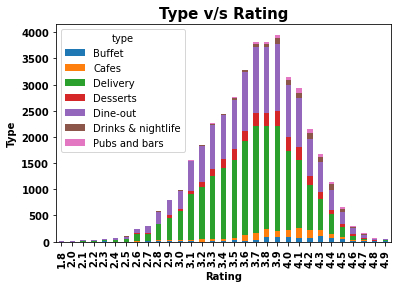

In [ ]:
# 8) Type and Rating
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type v/s Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

In [ ]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df1 = Encode(df.copy())
df1.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

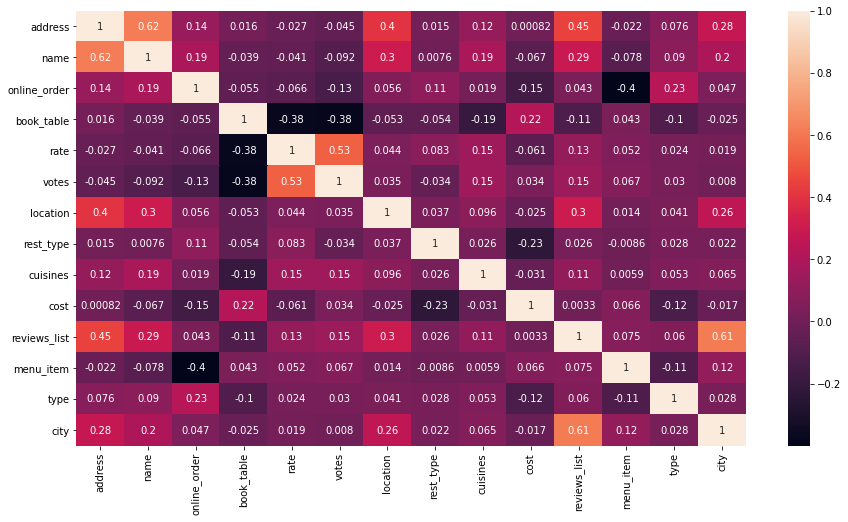

In [ ]:
#Get Correlation between different variables
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1.columns

## The highest correlation is between name and address which is 0.62 which is not of very much concern

# Building our model

### Regression Analysis

---



In [ ]:
# Splitting the dataset
#Defining the independent variables and dependent variables
x =df1.iloc[:,[2,3,5,6,7,8,9,11]]
y = df1['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
16950,0,1,0,8,2,5,250.0,0
767,0,1,131,8,4,278,400.0,190
6750,0,1,137,45,2,1295,250.0,0
9471,0,1,74,16,0,537,1.0,0
25162,0,1,61,12,2,1860,350.0,0


In [ ]:
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

In [ ]:
## Linear Regression 
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2736233722103949

In [ ]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8553120324309675

In [ ]:
## Random Forest Regression
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8773808619238765

In [ ]:
## Extra Tree Regressor
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9385169515710253

It can be observed that we have got the best accuracy for Extra tree regressor